#### Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
-  'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset: [Credit Card Fraud Detection (Kaggle)](https://www.kaggle.com/mlg-ulb/creditcardfraud)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/input/creditcard.csv')

import matplotx
plt.style.use(matplotx.styles.github["dark"])

1. Visão geral

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Dimensão do dataset:", df.shape)
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Dimensão do dataset: (284807, 31)
O dataset possui 284807 linhas e 31 colunas.


Resumo estatístico:

In [4]:
df.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
5%,25297.600000,-2.899147e+00,-1.971975e+00,-2.389740e+00,-2.195683e+00,-1.702021e+00,-1.406757e+00,-1.434423e+00,-8.421469e-01,-1.758426e+00,...,-5.046735e-01,-1.081892e+00,-4.722464e-01,-1.143662e+00,-8.250264e-01,-6.973483e-01,-4.152460e-01,-3.178432e-01,0.920000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,...,3.761555e-01,9.148826e-01,3.392860e-01,7.054036e-01,6.009027e-01,6.889469e-01,2.653679e-01,1.799362e-01,203.000000,0.000000
95%,164143.400000,2.081223e+00,1.808585e+00,2.062635e+00,2.566501e+00,2.098960e+00,3.160382e+00,1.407632e+00,1.049984e+00,1.780783e+00,...,5.378677e-01,1.128987e+00,4.880160e-01,8.663576e-01,7.606986e-01,9.209154e-01,3.877462e-01,2.560897e-01,365.000000,0.000000


- Insights


In [5]:
# verificando valores nulos
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

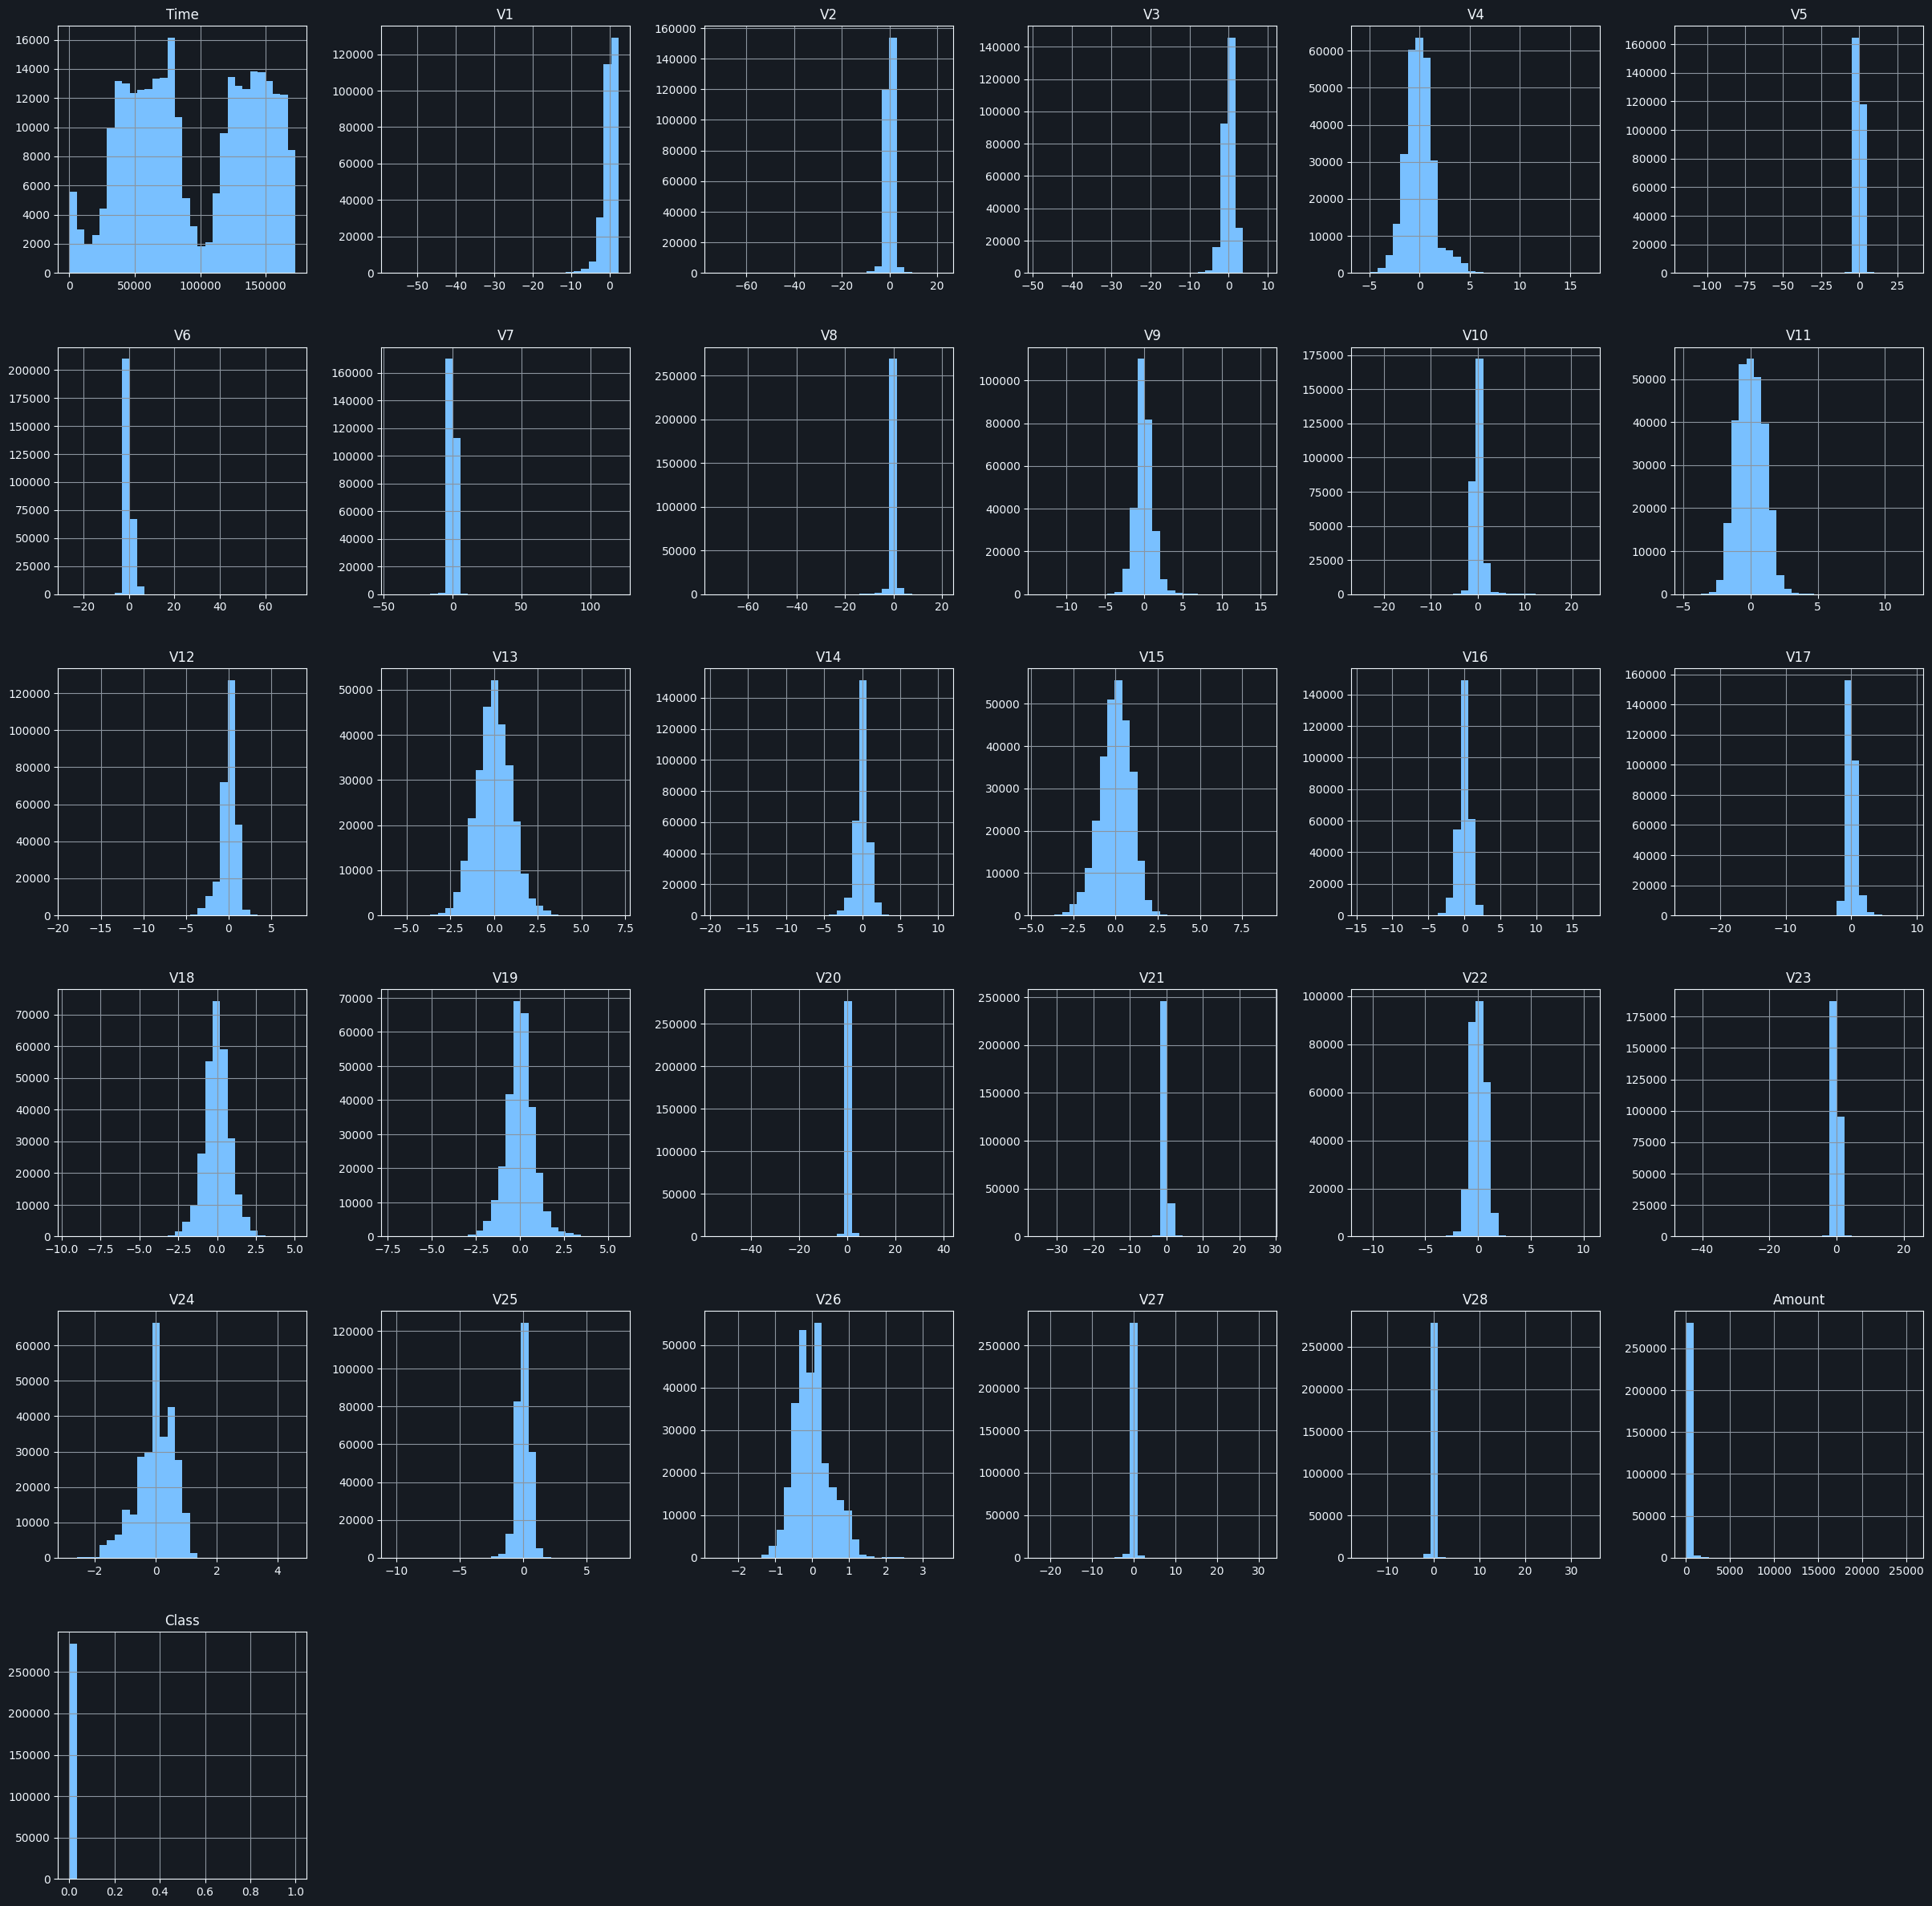

In [6]:
df.hist(bins=30, figsize=(30, 30))

In [7]:
# valores duplicados
df.duplicated().sum()

np.int64(1081)

In [8]:
# removendo duplicados
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
# distribuição das classes
class_counts = df['Class'].value_counts()

print("\nDistribuição das classes:")
print(class_counts)
print("\nPercentual por classe:")
print(class_counts / len(df) * 100)


Distribuição das classes:
Class
0    283253
1       473
Name: count, dtype: int64

Percentual por classe:
Class
0    99.83329
1     0.16671
Name: count, dtype: float64


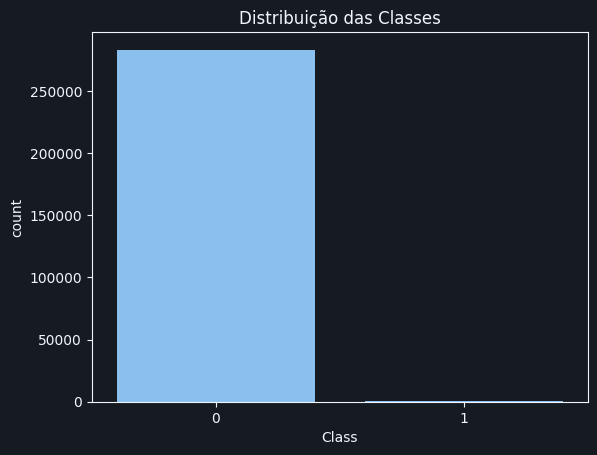

In [10]:
# plotando a distribuição das classes
y = df['Class'].copy()

sns.countplot(x=y)
plt.title('Distribuição das Classes')
plt.show()

In [11]:
# checando a correlação entre as colunas
df.corr()["Class"].sort_values(ascending=False)


Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

In [12]:
# correlações

df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


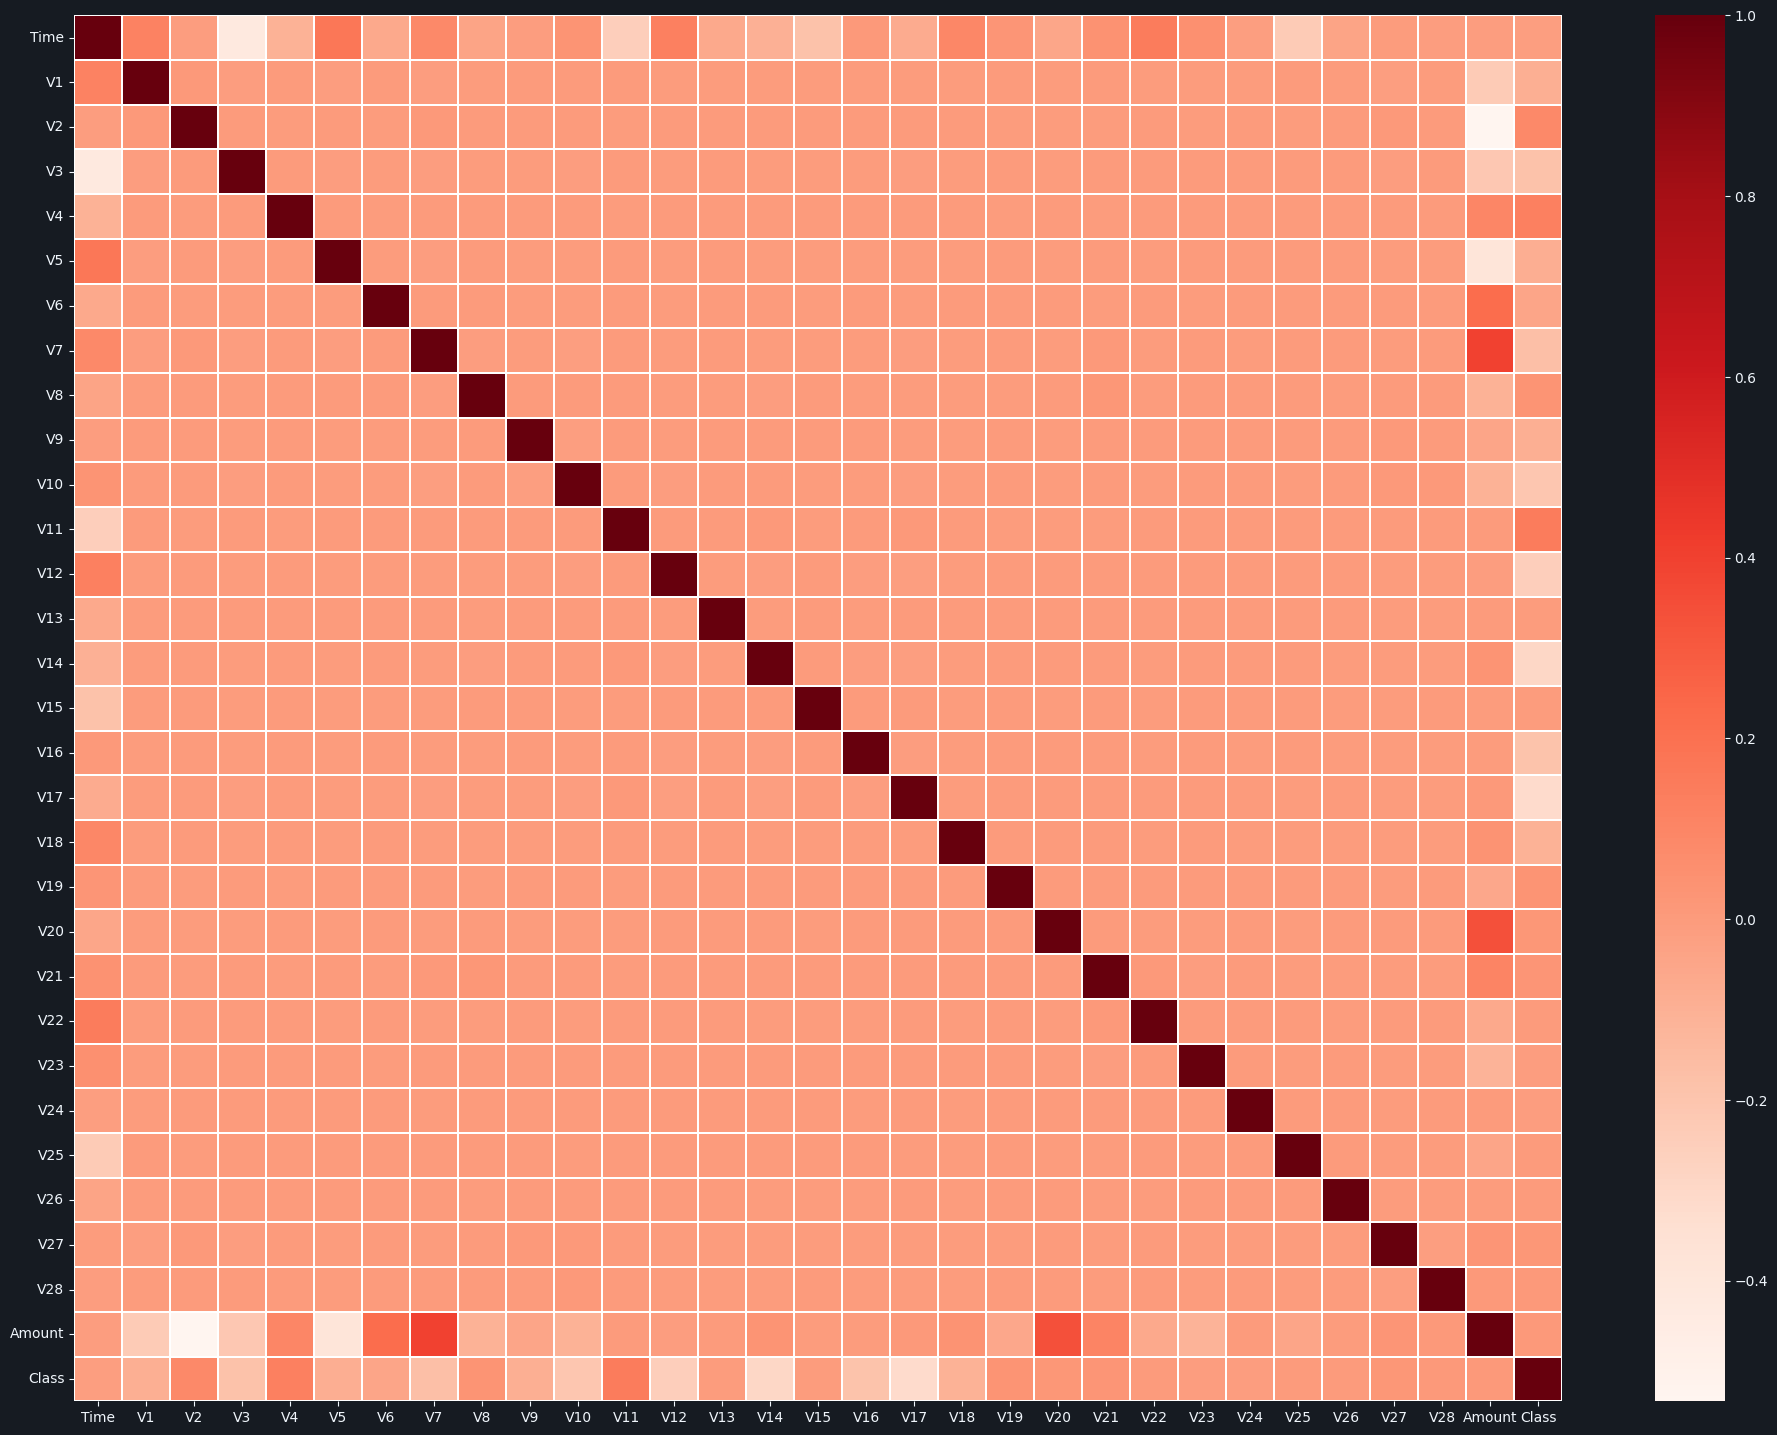

In [13]:
# heatmap das correlações
corr = df.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

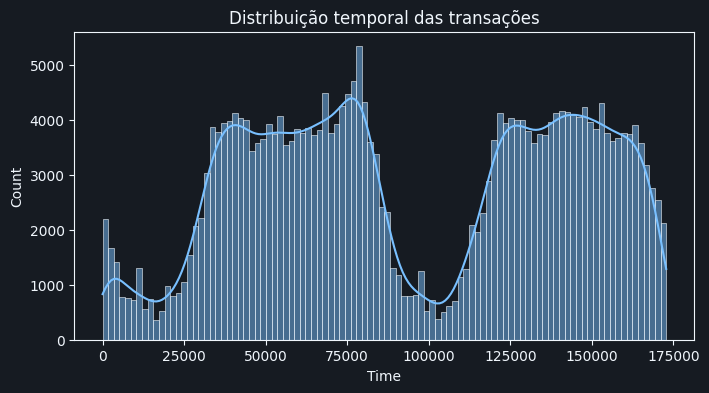

In [14]:
# distribuição das transações no tempo
plt.figure(figsize=(8,4))
sns.histplot(df["Time"], bins=100, kde=True)
plt.title("Distribuição temporal das transações")
plt.show()

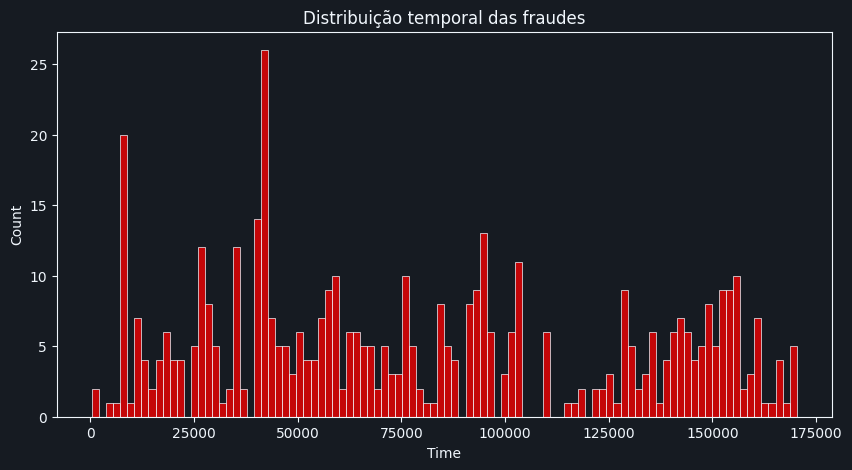

In [15]:
# distr temporal de fraudes (class = 1)
plt.figure(figsize=(10,5))
sns.histplot(df[df["Class"]==1]["Time"], bins=100, color="red", kde=False)
plt.title("Distribuição temporal das fraudes")
plt.show()

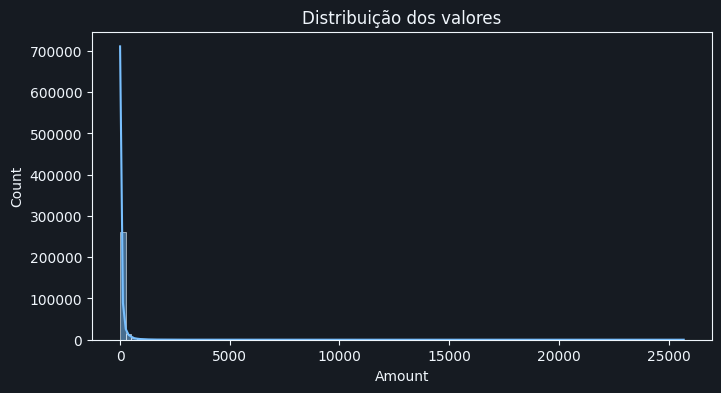

In [16]:
# distribuição dos valores das transações
plt.figure(figsize=(8,4))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Distribuição dos valores")
plt.show()

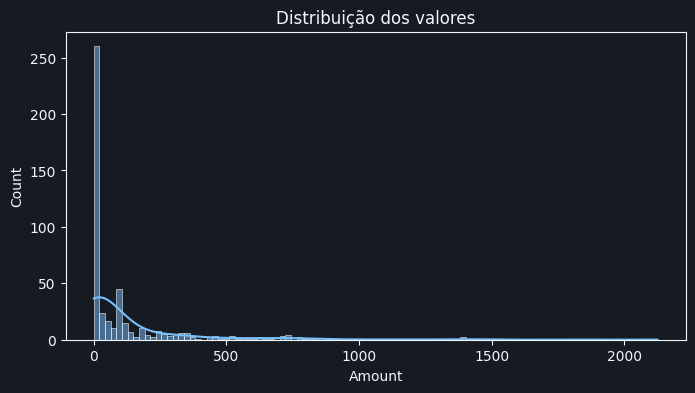

In [17]:
# distribuição dos valores das transações
plt.figure(figsize=(8,4))
sns.histplot(df.query("Class == 1")["Amount"], bins=100, kde=True)
plt.title("Distribuição dos valores")
plt.show()

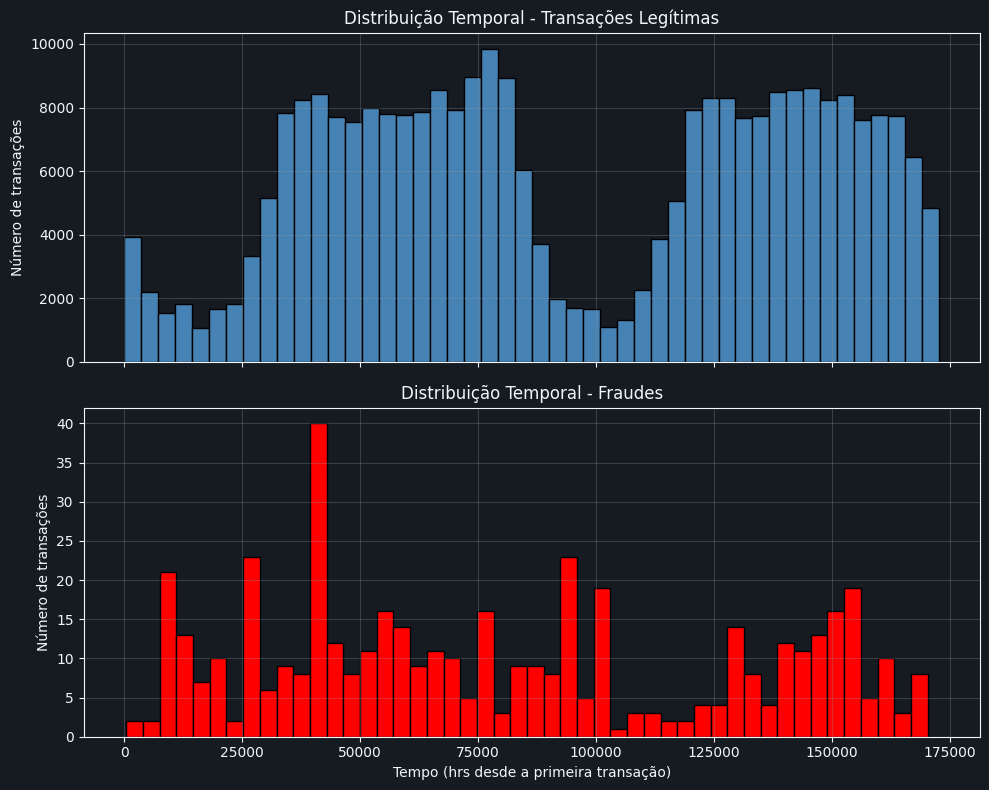

In [ ]:
##### Distribuição temporal só de fraudes e de não fraudes

fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# Transações legítimas
axes[0].hist(df[df["Class"]==0]["Time"], bins=48, color="steelblue", edgecolor="black")
axes[0].set_title("Distribuição Temporal - Transações Legítimas")
axes[0].set_ylabel("Número de transações")
axes[0].grid(True, alpha=0.3)

# Transações fraudulentas
axes[1].hist(df[df["Class"]==1]["Time"], bins=48, color="red", edgecolor="black")
axes[1].set_title("Distribuição Temporal - Fraudes")
axes[1].set_xlabel("Tempo (hrs desde a primeira transação)")
axes[1].set_ylabel("Número de transações")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Graf1: as transações legítimas seguem um padrão bem distribuído ao longo das ~48 horas.


Graf2: as transações fraudes parecem se concentrar em alguns intervalos específicos.